In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn import svm

data = pd.read_excel("/Users/hendershot/Desktop/data science + machine learning/datasets/HeartDisease.xlsx")

# data sample

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [18]:
# amount of data

data.shape

(303, 14)

In [19]:
# describing data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
hearttrain, hearttest = train_test_split(data, train_size=0.70, random_state=1)

In [87]:
# train test/logistic regression

import statsmodels.api as sm

# independent and dependent variables
xtrain = hearttrain[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytrain = hearttrain[['target']]

# building model
log_reg = sm.Logit(ytrain, xtrain).fit()

print(log_reg.summary())

from sklearn.metrics import(confusion_matrix, accuracy_score)

# independent and dependent variables 
xtest = hearttest[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytest = hearttest[['target']]

yhat = log_reg.predict(xtest)
prediction = list(map(round, yhat))

print (yhat)
print('Predictions :', prediction)

#confusion matrix
cm = confusion_matrix(ytest, prediction)
print ("Confusion Matrix: \n", cm)

#accuracy score of model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Optimization terminated successfully.
         Current function value: 0.368687
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.4653
Time:                        11:08:59   Log-Likelihood:                -78.162
converged:                       True   LL-Null:                       -146.18
Covariance Type:            nonrobust   LLR p-value:                 3.765e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0364      0.024     -1.497      0.134      -0.084       0.011
sex            1.4600      0.

In [9]:
# feature importance https://predictivehacks.com/feature-importance-in-python/

model=RandomForestClassifier()

features=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
 
model.fit(features,data['target'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,thal,0.128634
7,thalach,0.126589
2,cp,0.122263
9,oldpeak,0.115788
11,ca,0.110481
0,age,0.085616
4,chol,0.083075
3,trestbps,0.077208
10,slope,0.047197
8,exang,0.042331


In [20]:
# checking for missing values 

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
# support vector machine (svm) https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(xtrain, ytrain)
prediction2 = clf.predict(xtest)

from sklearn import metrics

# accuracy
print("Accuracy: ", metrics.accuracy_score(ytest, prediction2))

# precision
print("Precision:",metrics.precision_score(ytest, prediction2))

# recall
print("Recall:",metrics.recall_score(ytest, prediction2))

# confussion matrix
cm2 = confusion_matrix(ytest, prediction2)

print ("Confusion Matrix: \n", cm2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8791208791208791
Precision: 0.8974358974358975
Recall: 0.8333333333333334
Confusion Matrix: 
 [[45  4]
 [ 7 35]]


In [44]:
# random forest https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

clf2 = RandomForestClassifier(n_estimators = 100)

clf2.fit(xtrain, ytrain)

prediction3 = clf2.predict(xtest)

from sklearn import metrics
print()

# accuracy
print("Accuracy: ", metrics.accuracy_score(ytest, prediction3))

# confussion matrix
cm3 = confusion_matrix(ytest, prediction3)

print ("Confusion Matrix: \n", cm3)


Accuracy:  0.8791208791208791
Confusion Matrix: 
 [[46  3]
 [ 8 34]]


/var/folders/k_/h372tzbs1kndwxscp79k019m0000gn/T/ipykernel_18413/3472287217.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(xtrain, ytrain)


[[ 56.57407407 326.25925926]
 [ 52.15044248 198.68141593]
 [ 55.49264706 254.99264706]]


<AxesSubplot:xlabel='age', ylabel='chol'>

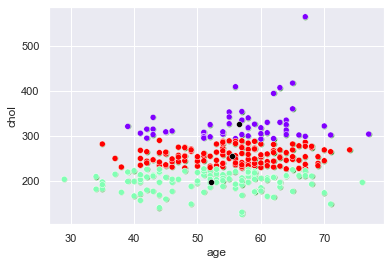

In [86]:
# clustering: k-means https://wellsr.com/python/python-kmeans-clustering-with-scikit-learn/

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

xcluster = data.filter(["age", "chol"], axis = 1)

sns.scatterplot(data = xcluster, x="age", y= "chol", c = ["green"])

model = KMeans(n_clusters= 3)
model.fit(xcluster)

print(model.cluster_centers_)

sns.scatterplot(data = xcluster, x="age", y= "chol", c= model.labels_, cmap= 'rainbow' )

sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])